# Perceptron
Notice `Linear` that happened to show in task

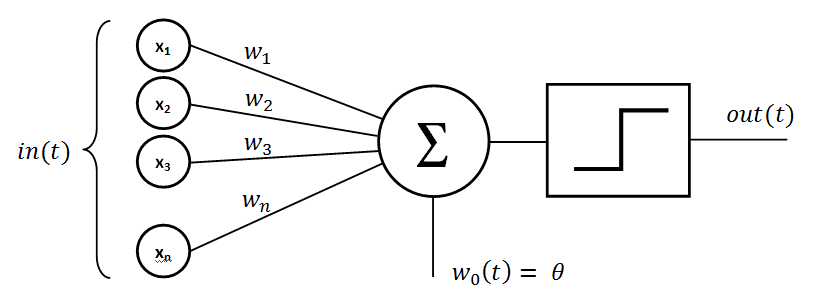

### Create a Perceptron (See task answer)

# Circles Classification Problem

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

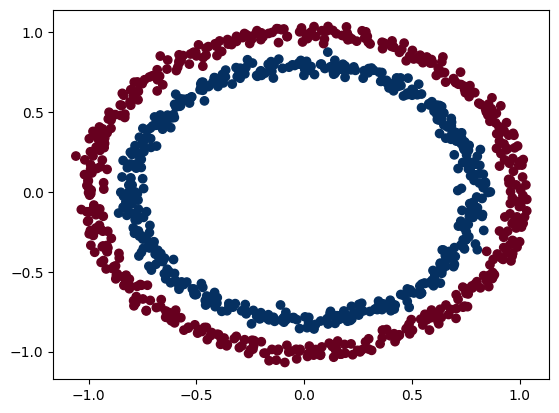

In [2]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [3]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float) #convert from numpy to tensor and casted to float 32 #msh 3arfa leh
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

print(f"Train Shape: {X_train.shape} | Test Shape: {X_test.shape}")


Train Shape: torch.Size([800, 2]) | Test Shape: torch.Size([200, 2])


In [4]:
print(f"Data Point: {X_train[0]}")

Data Point: tensor([ 0.7932, -0.5769])


# Activation Function

### Go [Here](https://playground.tensorflow.org/)

In [5]:
import torch.nn as nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10) #LAYER 1
        self.fc2 = nn.Linear(10, 10) #LAYER2
        self.fc3 = nn.Linear(10, 1)#LAYER3
        self.relu = nn.ReLU() #ACTIVATION FUNCTION
    def forward(self, x):
        return torch.squeeze(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))) #KA2ENAHA FLATTEN
    
    

In [6]:
model: nn.Module = CircleModel()
print(model)

CircleModel(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [18]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
CircleModel                              --
├─Linear: 1-1                            30
├─Linear: 1-2                            110
├─Linear: 1-3                            11
├─ReLU: 1-4                              --
Total params: 151
Trainable params: 151
Non-trainable params: 0

In [9]:
import torch.optim as optim
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters()#method in PyTorch returns an iterator over the learnable parameters of the model.
                                        #The learnable parameters are the weights and biases of the model.
                       , lr=0.001)


In [10]:
print(f"Model: {model.state_dict()}") #prints weight and biases of the model

Model: OrderedDict([('fc1.weight', tensor([[-0.3306, -0.6066],
        [-0.6989, -0.6826],
        [-0.5319,  0.5385],
        [ 0.2591,  0.2167],
        [-0.3737,  0.0781],
        [ 0.3515, -0.6500],
        [ 0.4590, -0.2585],
        [-0.0197,  0.0772],
        [-0.6926, -0.2410],
        [-0.2975,  0.2511]])), ('fc1.bias', tensor([-0.4705, -0.2463, -0.0634, -0.6305,  0.0658,  0.3265,  0.6178, -0.2844,
         0.7034, -0.3644])), ('fc2.weight', tensor([[-0.2599, -0.0193, -0.2410,  0.2734, -0.2467,  0.2602,  0.0702, -0.2650,
          0.1333,  0.3015],
        [ 0.3098, -0.0981, -0.1024,  0.0755,  0.2147, -0.1095,  0.2202,  0.1003,
          0.2639, -0.2340],
        [ 0.0669,  0.2558, -0.0596, -0.3118, -0.2954, -0.1354, -0.0947,  0.0914,
          0.1995,  0.1866],
        [-0.0850, -0.0311,  0.1050,  0.2844, -0.1114,  0.1427,  0.2673,  0.1011,
         -0.1398, -0.2348],
        [ 0.2606, -0.0847,  0.1152, -0.2138,  0.1400, -0.2991,  0.1952, -0.2082,
         -0.0029,  0.1170],


In [11]:
from helper_functions import plot_decision_boundary

def plot_boundaries( #plots the decision boundaries of a neural network model.
    model: nn.Module,
    train_data: torch.Tensor = X_train,
    train_labels: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_labels: torch.Tensor = y_test,
    ):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, train_data, train_labels)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, test_data, test_labels)

def train(
        model: nn.Module,
        loss_function: nn.Module = loss_function,
        optimizer: optim.Optimizer = optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(num_epochs):
        model.train()

        y_preds = model(train_data)

        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

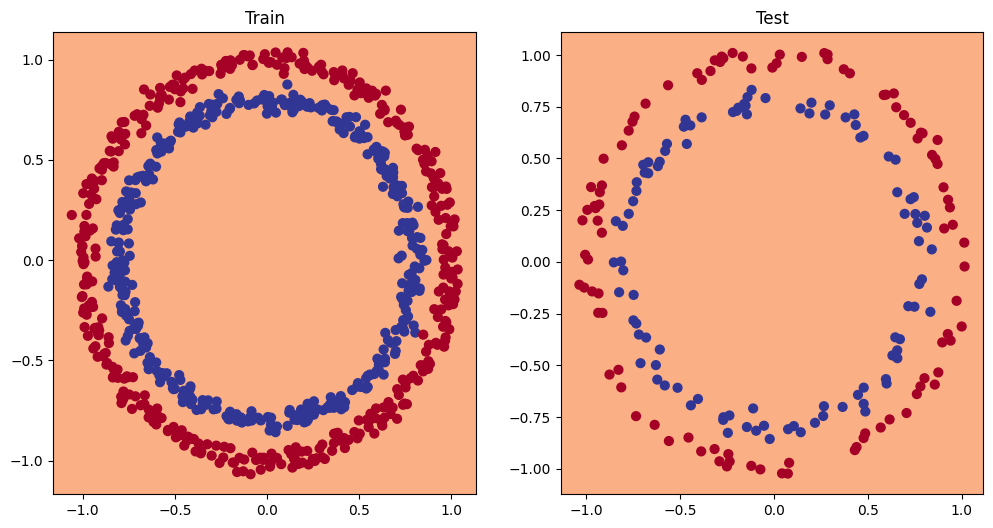

In [12]:
plot_boundaries(model)

In [14]:
epochs_count, train_loss, test_loss = train(model, num_epochs=1000)

Epoch 0: train loss 0.6964590549468994, test loss 0.6939576864242554
Epoch 10: train loss 0.6944026947021484, test loss 0.6926558613777161
Epoch 20: train loss 0.693173885345459, test loss 0.6920714378356934
Epoch 30: train loss 0.6922515630722046, test loss 0.6915536522865295
Epoch 40: train loss 0.6912872791290283, test loss 0.6907715797424316
Epoch 50: train loss 0.690315842628479, test loss 0.6899228692054749
Epoch 60: train loss 0.6893827319145203, test loss 0.6891700625419617
Epoch 70: train loss 0.6884351968765259, test loss 0.6883054375648499
Epoch 80: train loss 0.6873591542243958, test loss 0.6873708963394165
Epoch 90: train loss 0.6861370801925659, test loss 0.6863099932670593
Epoch 100: train loss 0.6847265362739563, test loss 0.6850782632827759
Epoch 110: train loss 0.6830810308456421, test loss 0.6835876703262329
Epoch 120: train loss 0.6812163591384888, test loss 0.6818758249282837
Epoch 130: train loss 0.6791303157806396, test loss 0.6799428462982178
Epoch 140: train lo

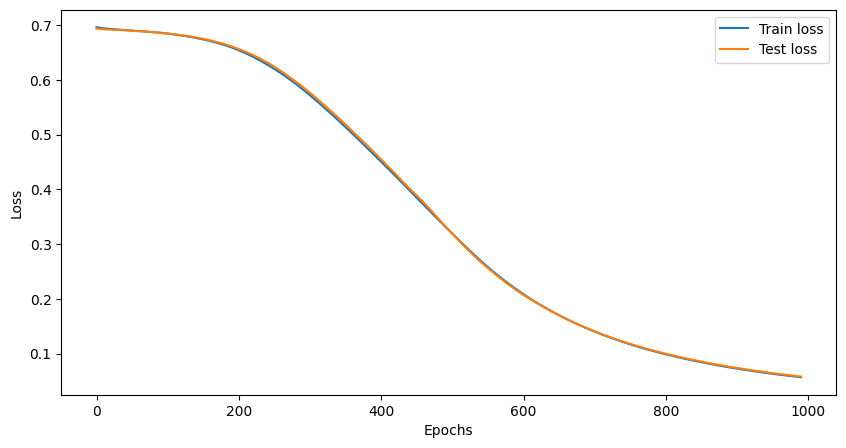

In [15]:
plot_stats(epochs=epochs_count, train_loss=train_loss, test_loss=test_loss)


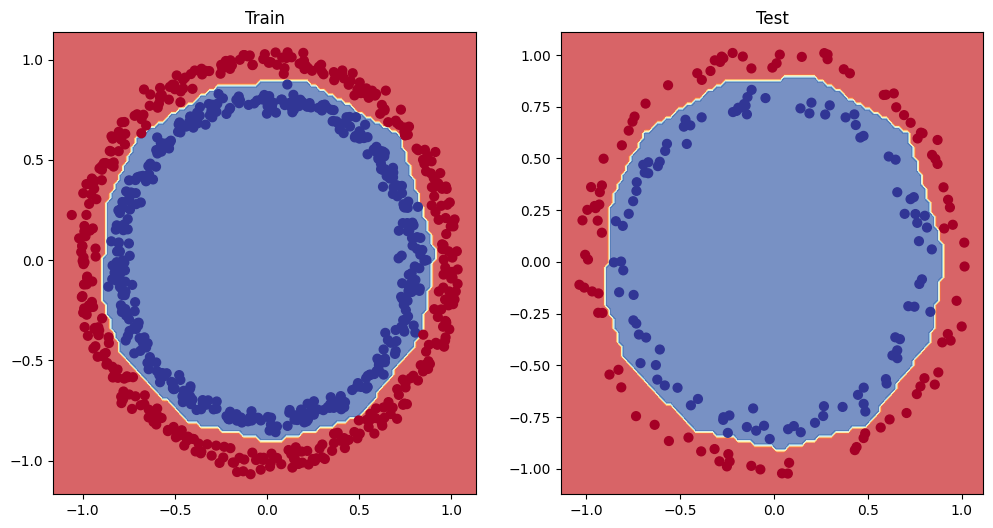

In [16]:
plot_boundaries(model)

In [17]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="binary")

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

accuracy(y_preds, y_test)

tensor(1.)

In [17]:
sample = torch.tensor([[-0.8, -0.5]]) # put any sample. Note size of sample (number, 2)
with torch.inference_mode():
    y_pred = model(sample)
    y_pred = torch.sigmoid(y_pred)
    y_pred = torch.round(y_pred)
    


y_pred

tensor(0.)

# <font color="green">Blob Solver Exercise</font>

# <font color="green">MNist Solver Exercise</font>

# Terminologies & Recap
1. **Activation Function**: A function that decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.


2. **Overfitting**: Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
3. **Underfitting**: Underfitting occurs when a model is too simple to learn the underlying structure of the data.